In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.io import loadmat

from xyz2grd import xyz2grd

In [3]:
def espaciamiento_grd(grd_data):
    dx=np.diff(grd_data.x.values)[0]*3600
    dy=np.diff(grd_data.y.values)[0]*3600
    return dx,dy

In [4]:
# Genera colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.gist_earth(np.linspace(0.5,1,256))
cols = np.vstack((c_agua, c_terr))
terreno=cm.colors.LinearSegmentedColormap.from_list("terreno", cols)

### Genera bati .grd desde un archivo.mat

In [8]:
#archivo .mat
mat_file=r"G:\My Drive\UTFSM\memoria\batimetrias\bat_IV_region\bat_l3_iv_region_sur_1sa.mat"
mat_data = loadmat(mat_file) #carga archivo .mat

# Carpeta de guardado archivo .grd
savedir=r'G:\My Drive\UTFSM\memoria\batimetrias\bat_IV_region'

# Ver contenidos (key) del archivo .mat
# Por ejemplo, para cargar variable 'bat': mat_data['bat']
for key in mat_data.keys():
    print(key,'\n',mat_data[key],'\n')

__header__ 
 b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Aug 17 16:33:52 2018' 

__version__ 
 1.0 

__globals__ 
 [] 

bat 
 [[ 288.1         -30.877      1851.92567484]
 [ 288.1         -30.87727778 1852.33640478]
 [ 288.1         -30.87755556 1852.92509624]
 ...
 [ 288.7         -32.45561111  -30.        ]
 [ 288.7         -32.45588889  -30.        ]
 [ 288.7         -32.45616667  -30.        ]] 



KeysView(<xarray.Dataset>
Dimensions:  (x: 2161, y: 5686)
Coordinates:
  * x        (x) float64 288.1 288.1 288.1 288.1 ... 288.7 288.7 288.7 288.7
  * y        (y) float64 -32.46 -32.46 -32.46 -32.46 ... -30.88 -30.88 -30.88
Data variables:
    z        (y, x) float64 -2.309e+03 -2.308e+03 -2.306e+03 ... 650.8 652.8)

Espaciamiento [seg]:  [1. 1.]


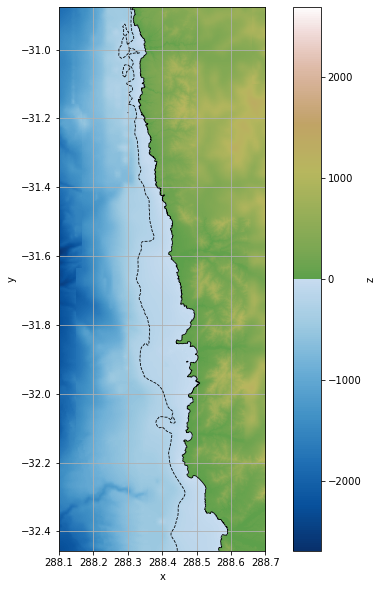

In [9]:
# Crear archivo grd

#separa en vectores x,y,z
x=mat_data['bat'][:,0]
y=mat_data['bat'][:,1]
z=mat_data['bat'][:,2]

#genera dataset desde vectores x, y, z
grd=xyz2grd(x,y,-z)

with grd as ds:
    print(ds.keys())

print("\nEspaciamiento [seg]: ",np.array(espaciamiento_grd(grd)))

fig,ax1=plt.subplots(figsize=(10,10))
grd.z.plot.imshow(cmap=terreno,ax=ax1)
grd.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.8,ax=ax1)

ax1.set_aspect('equal')
plt.grid()
plt.show()

In [10]:
# guardar

#nombre de archivo es el mismo que el archivo mat original
savename=os.path.splitext(os.path.basename(mat_file))[0]

grd.to_netcdf(os.path.join(savedir,savename+'.grd'),format='NETCDF3_CLASSIC')